# Analysing the Titanic Data

## Import statements

In [1]:
# data processing
import pandas as pd

# linear algebra
import numpy as np

# data visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# statistical tools
import scipy.stats as stats 

## Reading and Studying the Dataset

In [2]:
# Reading the csv file and saving it in a pandas.DataFrame Object
titanic_df = pd.read_csv('titanic_data.csv')

# Converting the headings to lowercase
titanic_df.columns = map(str.lower,titanic_df.columns)

In [3]:
# Reading the first 5 enteries of the dataset
titanic_df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Understanding the DataFrame
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          714 non-null    float64
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  cabin        204 non-null    object 
 11  embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<div style='display:flex; flex-direction: row; justify-content: space-between;'>
    <div style='flex-direction:column; flex-grow:1; flex-shirnk:1; width: 45%; border-right: 1px solid black; padding-right:10px'>
        <h2 align='center'> Data Description</h2>
        <table>
            <thead>
                <tr>
                    <th style="text-align:left">Variable</th>
                    <th style="text-align:left">Definition</th>
                </tr>
            </thead>
            <tbody>
                <tr>
                    <td style="text-align:left">survival</td>
                    <td style="text-align:left">Survival (0 = No, 1 = Yes)</td>
                </tr>
                <tr>
                    <td style="text-align:left">pclass</td>
                    <td style="text-align:left">Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)</td>
                </tr>
                <tr>
                    <td style="text-align:left">sex</td>
                    <td style="text-align:left">Sex (&#39;male&#39;, &#39;female&#39;)</td>
                </tr>
                <tr>
                    <td style="text-align:left">age</td>
                    <td style="text-align:left">Age (in years)</td>
                </tr>
                <tr>
                    <td style="text-align:left">sibsp</td>
                    <td style="text-align:left"># of siblings / spouses aboard the Titanic</td>
                </tr>
                <tr>
                    <td style="text-align:left">parch</td>
                    <td style="text-align:left"># of parents / children aboard the Titanic</td>
                </tr>
                <tr>
                    <td style="text-align:left">ticket</td>
                    <td style="text-align:left">Ticket number</td>
                </tr>
                <tr>
                    <td style="text-align:left">fare</td>
                    <td style="text-align:left">Passenger fare</td>
                </tr>
                <tr>
                    <td style="text-align:left">cabin</td>
                    <td style="text-align:left">Cabin number</td>
                </tr>
                <tr>
                    <td style="text-align:left">embarked</td>
                    <td style="text-align:left">Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)
                    </td>
                </tr>
            </tbody>
        </table>
    </div>
    <div style='flex-direction:column; flex-grow:1; flex-shirnk:1; width: 45%;'>
        <h2 align='center'>Variable Notes</h2>
        <ul>
            <li>pclass: A proxy for socio-economic status (SES)</li>
            <ul>
                <li>1st = Upper</li>
                <li> 2nd = Middle</li>
                <li> 3rd = Lower</li>
            </ul>
            <li>age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5</li>
            <li>sibsp: The dataset defines family relations in this way...</li>
            <ul>
                <li>
                    Sibling = brother, sister, stepbrother, stepsister</li>
                <li>Spouse = husband, wife (mistresses and fiancés were ignored)</li>
            </ul>
            <li>parch: The dataset defines family relations in this way...</li>
            <ul>
                <li>Parent = mother, father</li>
                <li>Child = daughter, son, stepdaughter, stepson. Some children travelled only with a nanny, therefore
                    parch=0 for them.</li>
            </ul>
        </ul>
    </div>
</div>

## Data Exploration:
The questions I wish to answer include:
1. How Survival is correlated to other attributes of the dataset?
2. Did Sex play a role in Survival?
3. Did class played role in survival?
4. Did age play a role in survival?
5. Did port of embarkation play a role in survival?

## Data Cleanup
We are interested in the following columns: passengerid, survived, pclass, sex, age, sibsp, parch, embarked.\
We shall delete the remaining columns.

In [5]:
# Dropping the columns we are not interested in
titanic_cleaned = titanic_df.drop(['name', 'ticket', 'cabin', 'fare'], axis=1)

# Reading the first 5 enteries of the cleaned dataset
titanic_cleaned.head()

,passengerid,survived,pclass,sex,age,sibsp,parch,embarked
0,1,0,3,male,22.0,1,0,S
1,2,1,1,female,38.0,1,0,C
2,3,1,3,female,26.0,0,0,S
3,4,1,1,female,35.0,1,0,S
4,5,0,3,male,35.0,0,0,S


In [6]:
# Finding the number of rows with null entries
titanic_cleaned.isnull().sum()

passengerid      0
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
embarked         2
dtype: int64

- We notice 177 rows have missing age. We shall ignore these rows when analysing age.
- We notice 2 rows have missing embarked. We shall ignore these rows when analysing embarker.

In [7]:
# Finding the basic statistics of the numerical data in the dataframe
describe = titanic_cleaned.describe()

# Saving the findings in a csv file
describe.to_csv('statistics_of_titanic.csv')
print(describe)

# Finding the basic statistics of the numerical data in the dataframe
describe = titanic_cleaned.describe(include=['O'])

# Saving the findings in a csv file
describe.to_csv('statistics_of_titanic.csv', mode = 'a')
print(describe)

passengerid    survived      pclass         age       sibsp       parch
count   891.000000  891.000000  891.000000  714.000000  891.000000  891.000000
mean    446.000000    0.383838    2.308642   29.699118    0.523008    0.381594
std     257.353842    0.486592    0.836071   14.526497    1.102743    0.806057
min       1.000000    0.000000    1.000000    0.420000    0.000000    0.000000
25%     223.500000    0.000000    2.000000   20.125000    0.000000    0.000000
50%     446.000000    0.000000    3.000000   28.000000    0.000000    0.000000
75%     668.500000    1.000000    3.000000   38.000000    1.000000    0.000000
max     891.000000    1.000000    3.000000   80.000000    8.000000    6.000000
         sex embarked
count    891      889
unique     2        3
top     male        S
freq     577      644


On average, 38.38% of the people have survived.

### Question 1:
We shall find the relation `survived` attribute with each of the attributes of the dataset by computing Pearson's correlation coefficient.

In [8]:
titanic_cleaned.corr(method='pearson')['survived']

passengerid   -0.005007
survived       1.000000
pclass        -0.338481
age           -0.077221
sibsp         -0.035322
parch          0.081629
Name: survived, dtype: float64

- We notice that `survived` and `pclass` are negatively correlated, i.e., lower the value of `pclass` (1st class) higher its `survival` value (1). 
- Similarly, we notice that `age` and `sibsp` have a low negative correlation with `survived` and `parch` have a low positive correlation.

### Question 2: Sex and Survived
We shall compare the `sex` attribute with `survived` attribute of the dataset.

In [9]:
# Creating a pivot table of sex and survived
pivot_sex = pd.pivot_table(titanic_df,index ='sex',columns='survived',values = 'passengerid', aggfunc = 'count')
print(pivot_sex)

print('\nOf the people of each gender, the percent of people who survived are:')
print((pivot_sex[1] / pivot_sex.sum(axis=1) * 100).round(2))

survived    0    1
sex               
female     81  233
male      468  109

Of the people of each gender, the percent of people who survived are:
sex
female    74.20
male      18.89
dtype: float64


From the data, we get that 74.20% of female and 18.89% of male survived.\
Thus, **females** were more likely to survive.

#### Plotting the bar graph of the data

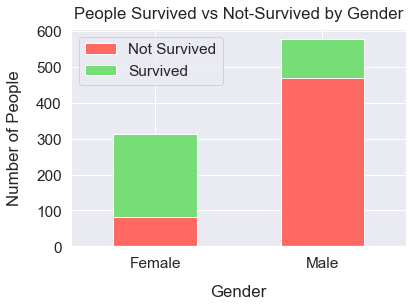

In [10]:
# Plotting the graph
sns.set(font_scale=1.4)
ax = pivot_sex.plot(kind='bar',stacked=True, color = ['#ff6961', '#77dd77'])
plt.xlabel("Gender", labelpad=14)
plt.ylabel("Number of People", labelpad=14)
ax.set_xticklabels(['Female','Male'],rotation=0)
plt.title("People Survived vs Not-Survived by Gender", y=1.02)
plt.legend(labels= ["Not Survived", "Survived"])
plt.show()

From the data and graph, we can conclude that **female** were more likely to survive as compared to male.

#### Testing using Chi-Square Test
We shall perform chi-square test of significance to determine whether gender and survival are related to each other or not.
\
\
**Null Hypothesis (H<sub>0</sub>):** Gender and survival are independent, i.e., they are not related.\
**Alternative Hypothesis (H<sub>0</sub>):** Gender and survival are not independent, i.e., they are related.\
\
We shall reject the null hypothesis at a significance level of $\alpha = 0.01$.

In [11]:
chisq, p = stats.chisquare(pivot_sex[1])
print(f"Chi statistic = {chisq}, p = {p}")
alpha = 0.01
print(f'Is p < alpha? {p<alpha}')

Chi statistic = 44.95906432748538, p = 2.0119672574477235e-11
Is p < alpha? True


For a Chi-square test, a p-value that is less than or equal to the significance level ($\alpha)$ indicates there is sufficient evidence to conclude that a relationship exists between the variables.\
\
Since, $p < \alpha$. Therefore, we shall reject the null hypothesis. \
\
Thus, gender does influence the survival of a person.

### Question 3: Class and Survived
We shall compare the `pclass` attribute with `survived` attribute of the dataset.

In [12]:
# Creating a pivot table of pclass and survived
pivot_class = pd.pivot_table(titanic_cleaned,index ='pclass',columns='survived',values = 'passengerid', aggfunc = 'count')
print(pivot_class)

print('\nOf the people in each class, the percent of survived people are:')
print((pivot_class[1] / pivot_class.sum(axis=1) * 100).round(2))

survived    0    1
pclass            
1          80  136
2          97   87
3         372  119

Of the people in each class, the percent of survived people are:
pclass
1    62.96
2    47.28
3    24.24
dtype: float64


From the data, we get that 62.96% of people in 1<sup>st</sup> class, 47.28% of people in 2<sup>nd</sup> class and 24.24% of people in 3<sup>rd</sup> class survived.\
Thus, people of **1<sup>st</sup> class** category were more likely to survive.

#### Plotting the bar graph of the data

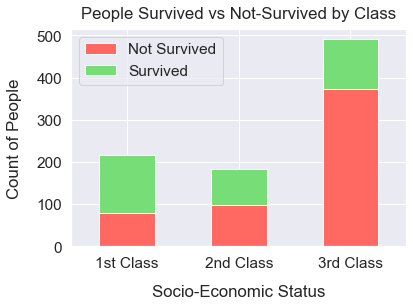

In [13]:
# Plotting
sns.set(font_scale=1.4)
ax = pivot_class.plot(kind='bar',stacked=True, color = ['#ff6961', '#77dd77'])
plt.xlabel("Socio-Economic Status", labelpad=14)
plt.ylabel("Count of People", labelpad=14)
ax.set_xticklabels(['1st Class', '2nd Class', '3rd Class'],rotation=0)
plt.title("People Survived vs Not-Survived by Class", y=1.02)
plt.legend(labels = ["Not Survived", "Survived"])
plt.show()

From the data and graph, we can conclude that people with **1<sup>st</sup> class Socio-Economic Status** were most likely to survive.

#### Testing using Chi-Square Test
We shall perform chi-square test of significance to determine whether class and survival are related to each other or not.
\
\
**Null Hypothesis (H<sub>0</sub>):** Class and survival are independent, i.e., they are not related.\
**Alternative Hypothesis (H<sub>0</sub>):** Class and survival are not independent, i.e., they are related.\
\
We shall reject the null hypothesis at a significance level of $\alpha = 0.01$.

In [14]:
chisq, p = stats.chisquare(pivot_class[1])
print(f"Chi statistic = {chisq}, p = {p}")
alpha = 0.01
print(f'Is p < alpha? {p<alpha}')

Chi statistic = 10.859649122807017, p = 0.004383864834301624
Is p < alpha? True


For a Chi-square test, a p-value that is less than or equal to the significance level ($\alpha)$ indicates there is sufficient evidence to conclude that a relationship exists between the variables.\
\
Since, $p < \alpha$. Therefore, we shall reject the null hypothesis. \
\
Thus, class does influence the survival of a person.

### Question 4: Age and Survived
We shall compare the `age` attribute with `survived` attribute of the dataset.

In [15]:
# Creating a pivot table of pclass and survived
pivot_age = pd.pivot_table(titanic_cleaned,index ='age',columns='survived',
                           values = 'passengerid', aggfunc = 'count', dropna = True)

pivot_age = pivot_age.groupby(pd.cut(pivot_age.index, np.arange(0, 81, 10))).sum()
print(pivot_age)

print('\nOf the people in each age group, the percent of survived people are:')
print((pivot_age[1] / pivot_age.sum(axis=1) * 100).round(2))

survived      0     1
(0, 10]    26.0  38.0
(10, 20]   71.0  44.0
(20, 30]  146.0  84.0
(30, 40]   86.0  69.0
(40, 50]   53.0  33.0
(50, 60]   25.0  17.0
(60, 70]   13.0   4.0
(70, 80]    4.0   1.0

Of the people in each age group, the percent of survived people are:
(0, 10]     59.38
(10, 20]    38.26
(20, 30]    36.52
(30, 40]    44.52
(40, 50]    38.37
(50, 60]    40.48
(60, 70]    23.53
(70, 80]    20.00
dtype: float64


From the data, we get that 59.38% of people of age less than 10 years survived.\
Thus, people of age **less than 10 years** were more likely to survive.

#### Plotting the histogram of the data

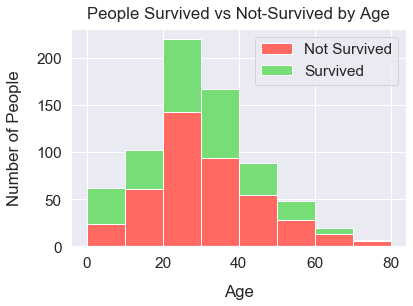

In [16]:
# Plotting
fig,ax = plt.subplots()
titanic_df['age'].plot.hist(bins=np.arange(0, 81, 10), color = '#77dd77')
titanic_df[titanic_df['survived']==0]['age'].plot.hist(bins=np.arange(0, 81, 10), color = '#ff6961')
plt.xlabel("Age", labelpad=14)
plt.ylabel("Number of People", labelpad=14)
plt.title("People Survived vs Not-Survived by Age", y=1.02)
handles, labels = ax.get_legend_handles_labels()
ax.legend([handles[1],handles[0]], ["Not Survived", "Survived"])
plt.show()

From the data and graph, we can conclude that people of age **less than 10 years** were most likely to survive.

### Question 5: Port of Embarkation and Survived
We shall compare the `embarked` attribute with `survived` attribute of the dataset.

In [17]:
# Creating a pivot table of embarked and survived
pivot_embark = pd.pivot_table(titanic_cleaned,index ='embarked',columns='survived',
                             values = 'passengerid', aggfunc = 'count', dropna = True)
print(pivot_embark)

print('\nOf the people who embarked from each port, the percent of survived people are:')
print((pivot_embark[1] / pivot_embark.sum(axis=1) * 100).round(2))

survived    0    1
embarked          
C          75   93
Q          47   30
S         427  217

Of the people who embarked from each port, the percent of survived people are:
embarked
C    55.36
Q    38.96
S    33.70
dtype: float64


From the data, we get that 55.36% of people who embarked from Cherbourg, 38.96% of people who embarked from Queenstown and 33.70% of people who embarked from Southampton survived.\
Thus, people who embarked from **Cherbourg** were more likely to survive.

#### Plotting the bar graph of the data

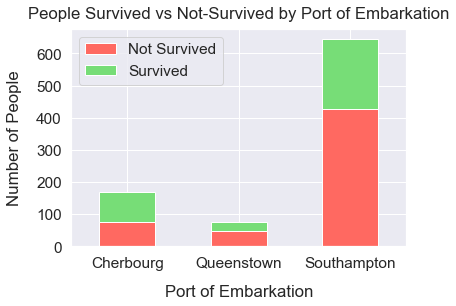

In [18]:
# Plotting
sns.set(font_scale=1.4)
#fig,ax = plt.subplots()
ax = pivot_embark.plot(kind='bar',stacked=True, color = ['#ff6961', '#77dd77'])
plt.xlabel("Port of Embarkation", labelpad=14)
plt.ylabel("Number of People", labelpad=14)
ax.set_xticklabels(['Cherbourg','Queenstown','Southampton'], rotation=0)
plt.title("People Survived vs Not-Survived by Port of Embarkation", y=1.02)
plt.legend(labels = ["Not Survived", "Survived"])
plt.show()

From the data and graph, we can conclude who embarked from **Cherbourg** were most likely to survive.

#### Testing using Chi-Square Test
We shall perform chi-square test of significance to determine whether port of embarkation and survival are related to each other or not.
\
\
**Null Hypothesis (H<sub>0</sub>):** Port of embarkation and survival are independent, i.e., they are not related.\
**Alternative Hypothesis (H<sub>0</sub>):** Port of embarkation and survival are not independent, i.e., they are related.\
\
We shall reject the null hypothesis at a significance level of $\alpha = 0.01$.

In [19]:
chisq, p = stats.chisquare(pivot_embark[1])
print(f"Chi statistic = {chisq}, p = {p}")
alpha = 0.01
print(f'Is p < alpha? {p<alpha}')

Chi statistic = 159.74705882352941, p = 2.0481743656423162e-35
Is p < alpha? True


For a Chi-square test, a p-value that is less than or equal to the significance level ($\alpha)$ indicates there is sufficient evidence to conclude that a relationship exists between the variables.\
\
Since, $p < \alpha$. Therefore, we shall reject the null hypothesis. \
\
Thus, port of embarkation does influence the survival of a person.

## Conclusion
From my exploratory analysis of the Titanic dataset we can conclude that, the following people were more likely to survive:
- Sex: Female
- Class: 1<sup>st</sup> class
- Age: Less than 10 years
- Port of embarkation: Cherbourg\
The results are coherent with the fact that women and children are saved first. Also, people with higher socio-economic status were saved before others.

This is a preliminary study, more analysis can be further done.